<a href="https://colab.research.google.com/github/Precillieo/WIDS-ML-Crash-Class/blob/main/Baby_Steps_Into_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baby Steps into Machine Learning


This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML. 

**Here is an overview of what we will be doing.** 
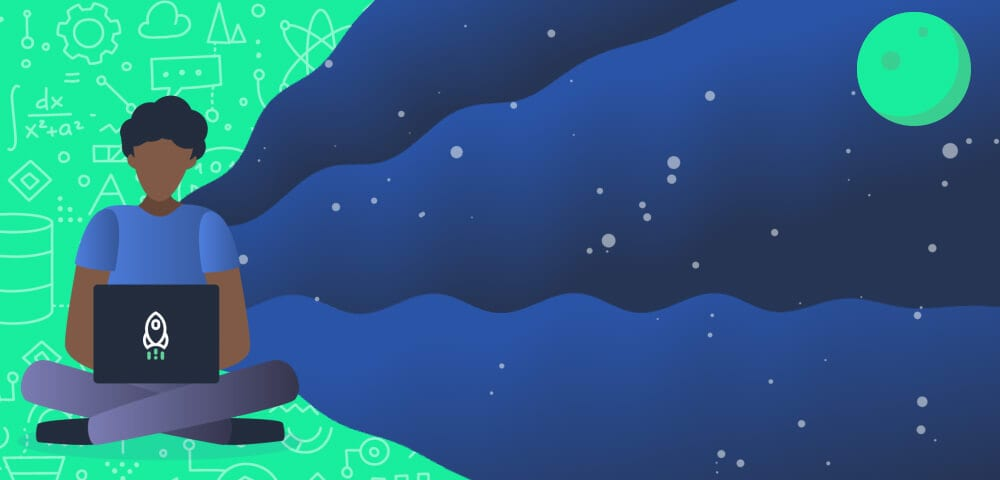
* Most used libraries and dependencies
* Step by step guides into ```Data Cleaning and Data Modeling.```
* The competition is simple: we will use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
* Various Algorithms to solve different problems
* Model Evaluation.
* Algorithm Performance Report.
* Saving and Loading Models
* Introduction to Model Deployment



**A machine learning model** is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data. Refer to this [link](https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a) for an overview of common machine learning models

The first step of capturing patterns from data is called fitting or training the model. The data used to fit the model is called the training data.

After the model has been fit, you can apply it to new data to predict prices of additional homes.

This notebook is the based on the [Machine Learning For Disaster(Titanic)](https://www.kaggle.com/c/titanic/overview)




## Import all Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split

## Examine The Data

In [2]:
train= pd.read_csv("/content/drive/MyDrive/Hackathon/train (3).txt")
test= pd.read_csv("/content/drive/MyDrive/Hackathon/test (2).txt")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("train_shape:", train.shape)
print("test_shape:", test.shape)

train_shape: (891, 12)
test_shape: (418, 11)


# Basic Data Exploration

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This includes 7/12. Showing that 5 other columns are categorical variables count, shows how many rows have non-missing values.

The ```mean``` calculates the average. std is the standard deviation, which measures how numerically spread out the values are. You will understand that shortly min, 25%, 50%, 75% and max values imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Let us take care of missing values**
Note: There are several ways this can be done. You will learn more about this during the subsequent trainings. We will use ```fillna``` method in this notebook. i.e Fill missing values with mean, mode or other things of your choice

In [11]:
missing_value=train.isnull().sum()
missing_value[missing_value>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [12]:
avg_age=train["Age"].mean(axis=0)
print("The Average of Age is:",avg_age)
train["Age"].fillna(avg_age,inplace=True)

The Average of Age is: 29.69911764705882


In [13]:
avg_age1=test["Age"].mean(axis=0)
print("The Average of Age is:",avg_age1)
test["Age"].fillna(avg_age1,inplace=True)

The Average of Age is: 30.272590361445783


In [14]:
train["Cabin"].fillna("Unknown",inplace=True)
test["Cabin"].fillna("Unknown",inplace=True)

In [15]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train['Embarked'].fillna(train.Embarked.mode, inplace= True)

In [17]:
test['Fare'].fillna(train.Fare.mean(), inplace= True)

## Data Visualization

**Let's play around how to visualize data** making use of various chats under seaborn, matplotlib.

### Target Value ```Survived```

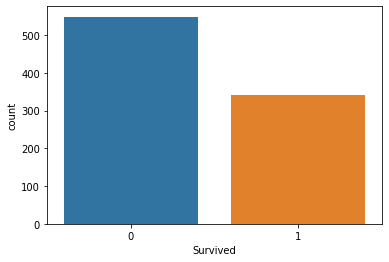

In [18]:
sns.countplot(data= train, x= train["Survived"])

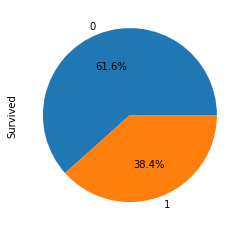

In [19]:
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

### Data Column ```Age```

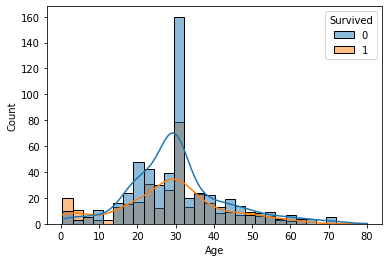

In [20]:
sns.histplot(data=train, x= train["Age"],hue= train['Survived'], kde = True)

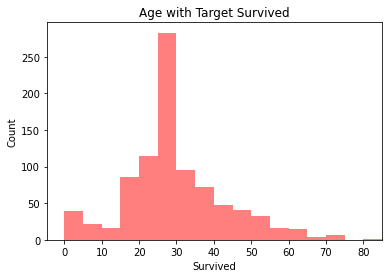

In [21]:
data = train.Age

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])
hue= train.Survived

plt.hist(data, bins=bins, color= "red", alpha=0.5)
plt.title('Age with Target Survived')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

### Data Column ```Fare```

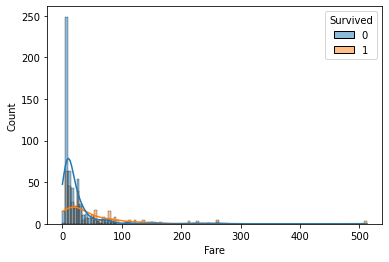

In [22]:
sns.histplot(data=train, x= train["Fare"],hue= train['Survived'], kde = True, color= 'red')

### Data Column ```Sex```

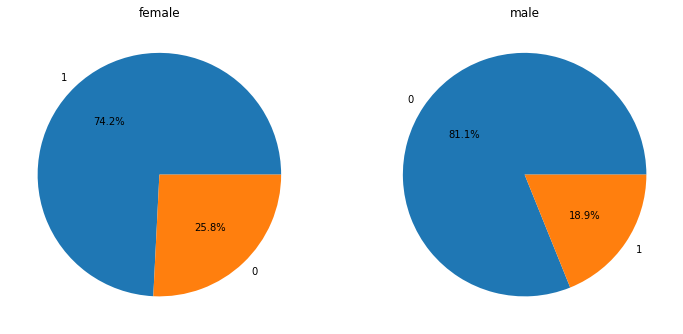

In [23]:
fig, axes = plt.subplots(1,2, figsize=(12,10))
cd= train.Sex.astype(str)
unique= np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train[train['Sex']==unique[i]]['Survived'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```Siblings and Spouse```

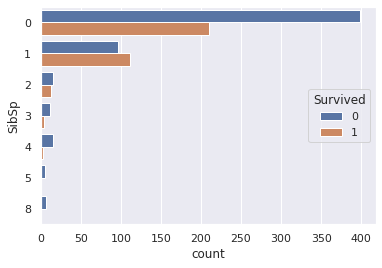

In [24]:
sns.set(style= 'darkgrid')
sns.countplot(y= 'SibSp', hue= 'Survived', data= train)
plt.show()

### Data Column ```Parch```

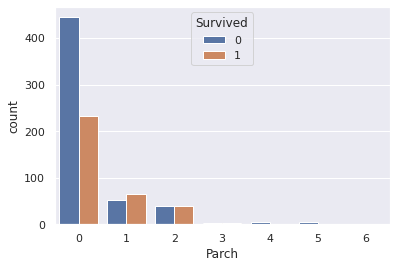

In [25]:
sns.set(style= 'darkgrid')
sns.countplot(x= 'Parch', hue= 'Survived', data= train)
plt.show()

### Data Column ```Embarked```

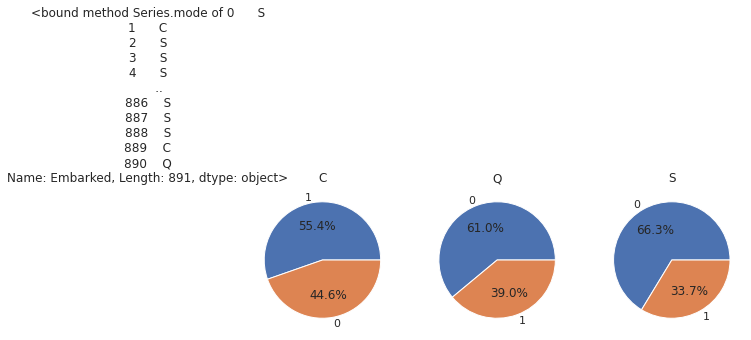

In [26]:
fig, axes = plt.subplots(1,4, figsize=(12,5))
pc= train.Embarked.astype(str)
unique= np.unique(pc)

for i, ax in enumerate(axes.flatten()):
    values = train[train['Embarked']==unique[i]]['Survived'].value_counts()
    values.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_title(str(unique[i]))
    ax.set_ylabel('')

plt.show()

### Data Column ```Pclass``` and ```HEATMAP```

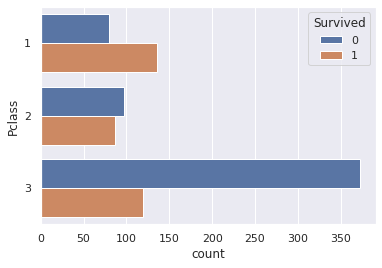

In [27]:
sns.set(style= 'darkgrid')
sns.countplot(y= 'Pclass', hue= 'Survived', data= train)
plt.show()

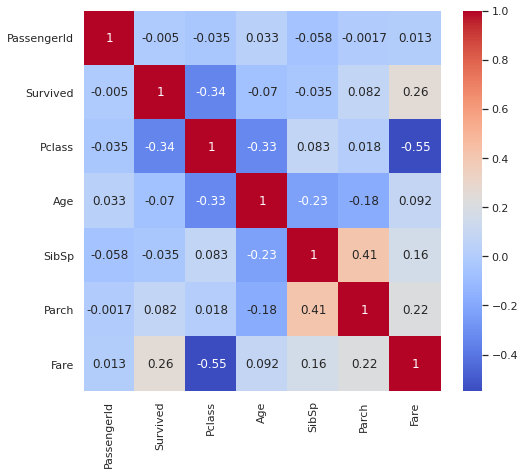

In [28]:
plt.figure(figsize=(8,7))
sns.heatmap(train.corr(), annot=True,cmap="coolwarm")
plt.show()

## Handling Categorical Columns

You will get an error if you try to plug these variables into most machine learning models in Python without preprocessing them first.

In [29]:
Categorical_cols=train.select_dtypes(include='object')
Categorical_cols.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S


In [30]:
print('We have {} categorical columns out of {} total columns'.format(len(Categorical_cols.columns),train.shape[1:]))

We have 5 categorical columns out of (12,) total columns


In [31]:
cols= ['Sex', 'Embarked', "Cabin", "Ticket"]
for i in cols:
  le= LabelEncoder()
  train[i]= le.fit_transform(train[i].astype(str))

In [32]:
cols= ['Sex', 'Embarked', 'Ticket', 'Cabin']
for i in cols:
  le= LabelEncoder()
  test[i]= le.fit_transform(test[i].astype(str))

### Dropping unnecessary data columns

In [33]:
cols_to_drop= ['Name', 'PassengerId']
train.drop(cols_to_drop, 1, inplace= True)

In [34]:
cols_to_drop= ['Name', 'PassengerId']
test.drop(cols_to_drop, 1, inplace= True)

# Building the Machine Learning model

Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

Define: What type of model will it be? Random Forest? Some other type of model? Some other parameters of the model type are specified too.

Fit: Capture patterns from provided data. This is the heart of modeling.

Predict: Just what it sounds like

Evaluate: Determine how accurate the model's predictions are.

We'll start with a model called the ```Random Forest```. There are fancier models that give more accurate predictions. But Decision Tree, Random Forest, Logistic Regression are easy to understand, and they are the basic building block for some of the best models in data science.

In [35]:
X=train.drop("Survived", axis=1)
y=train["Survived"]

## Model Evaluation Using Cross Val Score

In [36]:
Rf=RandomForestClassifier(n_estimators=100,random_state=99)


In [37]:
Rf_result=cross_val_score(Rf, X, y,cv=10)
print("Random Forest Accuracy is:",Rf_result)
Rf_result.mean()

Random Forest Accuracy is: [0.82222222 0.82022472 0.75280899 0.87640449 0.8988764  0.86516854
 0.82022472 0.80898876 0.8988764  0.83146067]


0.8395255930087391

## Split data into training and validation data, for both features and target

The split is based on a random number generator. Supplying a numeric value to the random_state argument guarantees we get the same split every time we run this script.

In [38]:
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 42)
Rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

**Note:**

Do not make predictions on your train data.

In [39]:
val_predictions = Rf.predict(val_x)
print(accuracy_score(val_y, val_predictions))

0.8251121076233184


## Making Prediction on Test Data and saving to a submission file 

In [40]:
Rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

In [41]:
test_yhat=Rf.predict(test)

## Algorithm Classification Performance Report

In [42]:
print(classification_report(val_y, val_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       134
           1       0.82      0.72      0.77        89

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



## Features in hierachy of their importance

Text(0.5, 0, 'Relative Importance')

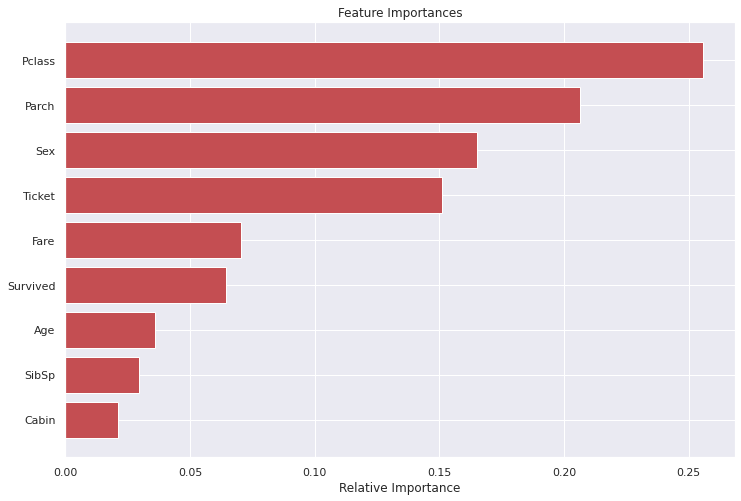

In [43]:
features=train.columns
importances = Rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Saving and Loading Models

In [44]:
import pickle

In [45]:
pickle.dump(Rf, open("titanicmodel", "wb"))

In [46]:
model_path= pickle.load(open('titanicmodel', 'rb'))

In [47]:
classifier= pickle.load(open(model_path, 'rb'))

TypeError: ignored

## Model Deployment

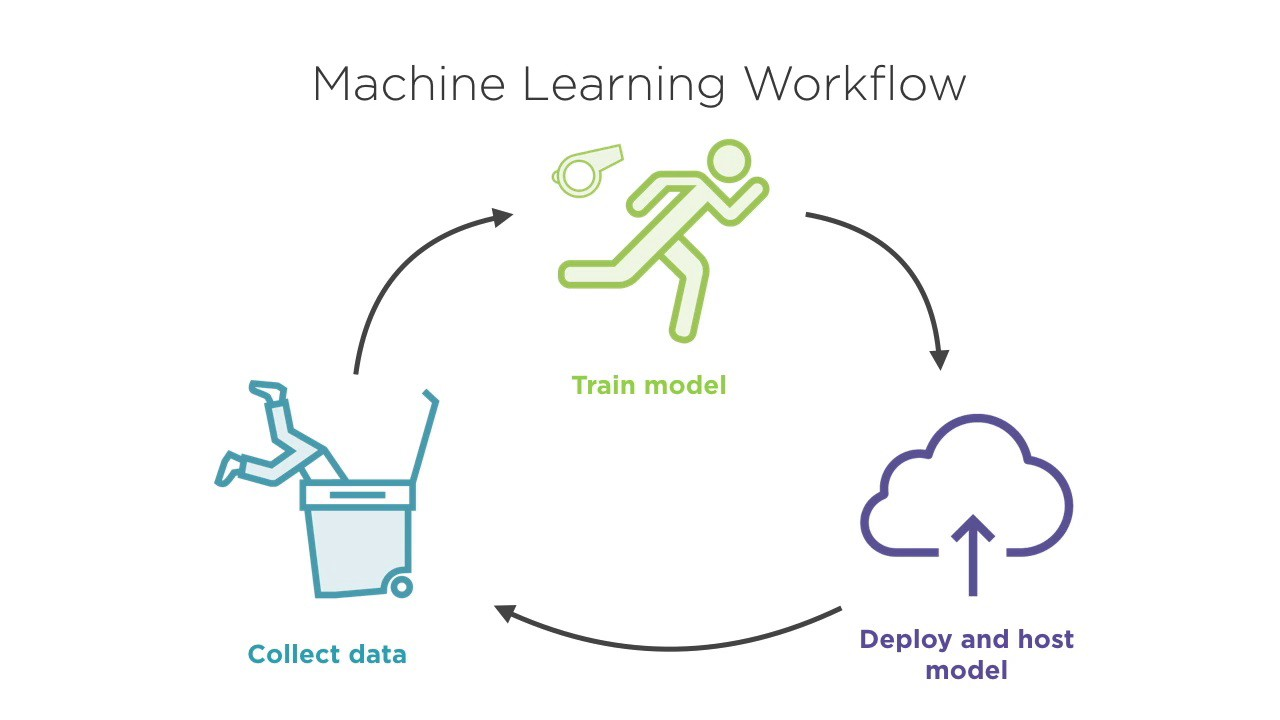